<a href="https://colab.research.google.com/github/suyash-2004/Customer-Segmentation-Using-KMeans-in-Python/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
data=pd.read_csv("Mall_Customers.csv")

**Mall  Customer Data** contains customer information that is valuable for understanding the demographics and behavior of mall visitors.

### The data includes the following features:

*  *Customer ID*

* *Customer Gender*

* *Customer Age*

* *Annual Income of the customer (in Thousand Dollars)*

* *Spending score of the customer (based on customer behaviour and spending nature)*

This dataset is essential for conducting various analyses, including customer segmentation and marketing strategies tailored to specific customer profiles, ultimately contributing to better decision-making for mall management and retail businesses.

# **Exploratory Data Analysis (EDA) of the sample Mall Data**

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 6)

The data has 200 entries, that is data from 200 customers.

In [ ]:
data.corr(numeric_only=1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.606887
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.139757
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.599457
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.263734
label,-0.606887,-0.139757,-0.599457,0.263734,1.000000






**Annual Income analysis**




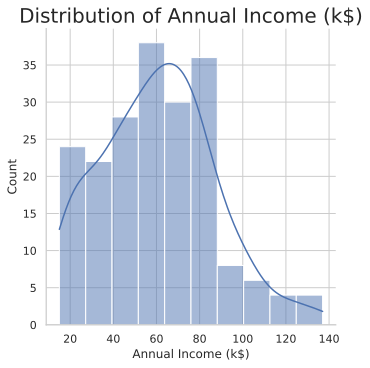

In [ ]:
sns.set(style='whitegrid')
sns.displot(data, x='Annual Income (k$)', kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

Most of the annual income falls between 50K to 85K.






**Age Analysis**





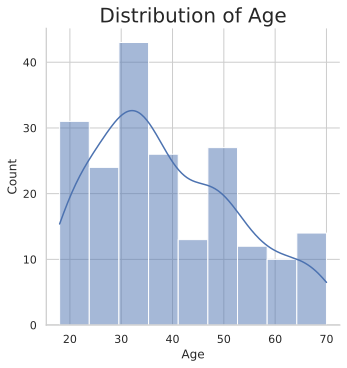

In [ ]:
sns.set(style='whitegrid')
sns.displot(data, x='Age', kde=True)  # Use displot with 'x' parameter
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()





**Spending Score Analysis**




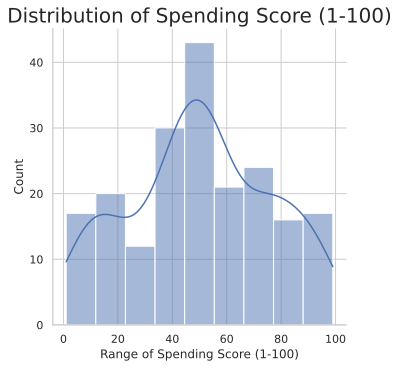

In [ ]:
sns.set(style = 'whitegrid')
sns.displot(data,x = 'Spending Score (1-100)', kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

The maximum spending score is in the range of 40 to 60.






**Gender Analysis**




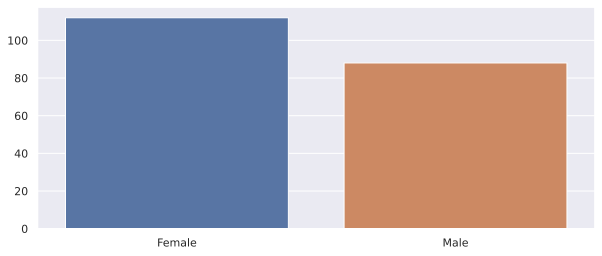

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

There are more female customers visiting the mall than male customers

# **Data Relationships**










**Age VS Gender Box Plot**





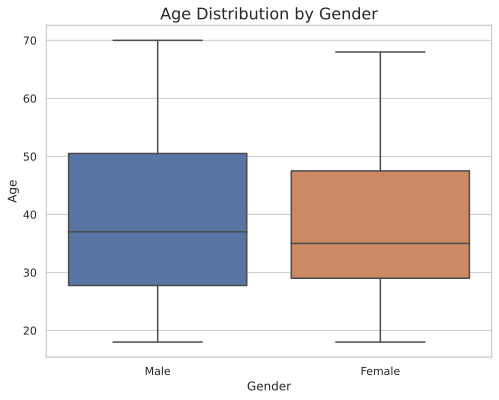

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Gender", y="Age", data=data)
plt.title("Age Distribution by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()






**Age VS Annual Income(k$) Scatter Plot** (With Respect to Gender)






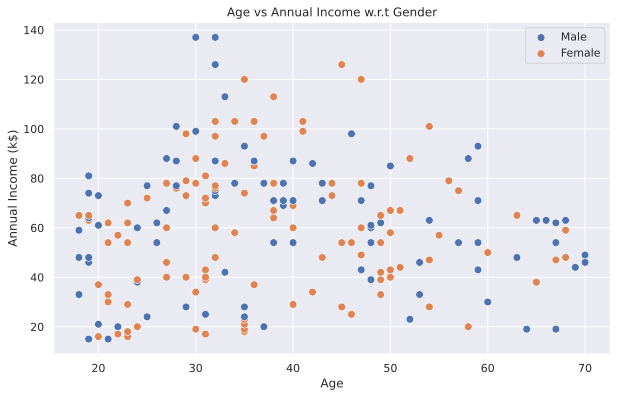

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()




**Age VS Spending Score (1-100) Scatter Plot**





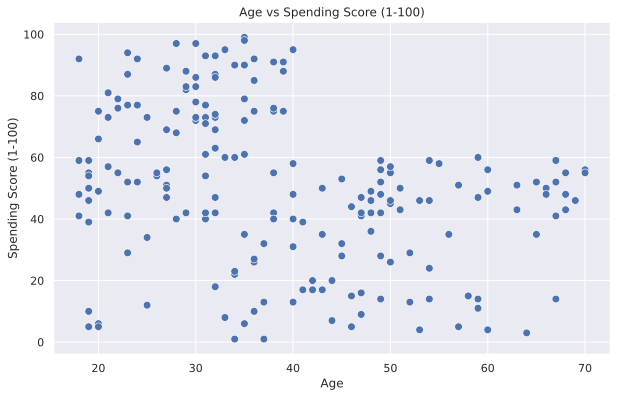

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Spending Score (1-100)' ,data = data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()






**Spending Score(1-100) VS Annual Income(k$) Scatter Plot**





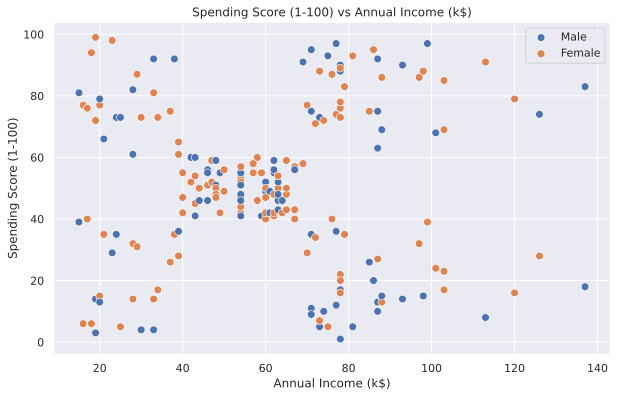

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()





**Age Distribution**





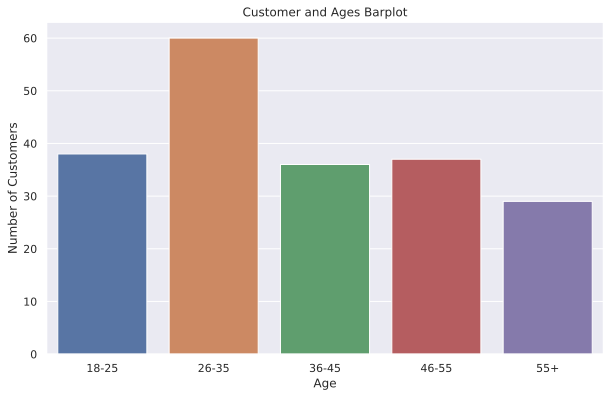

In [ ]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Makimum customers are in the range of 26 - 35 years of age





**Spending Score Distribution**



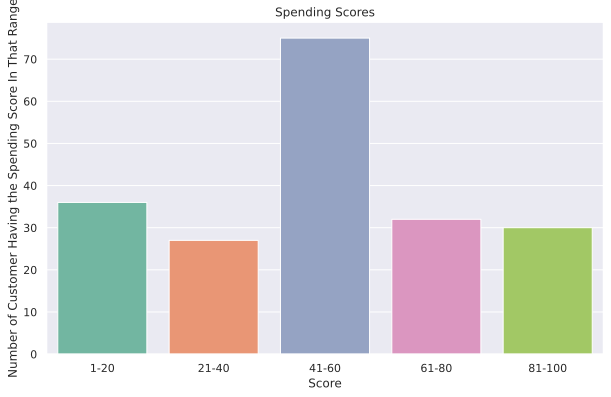

In [ ]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

Mximum customers have spending score ranging from 41 to 60





**Annual Income Distribution**





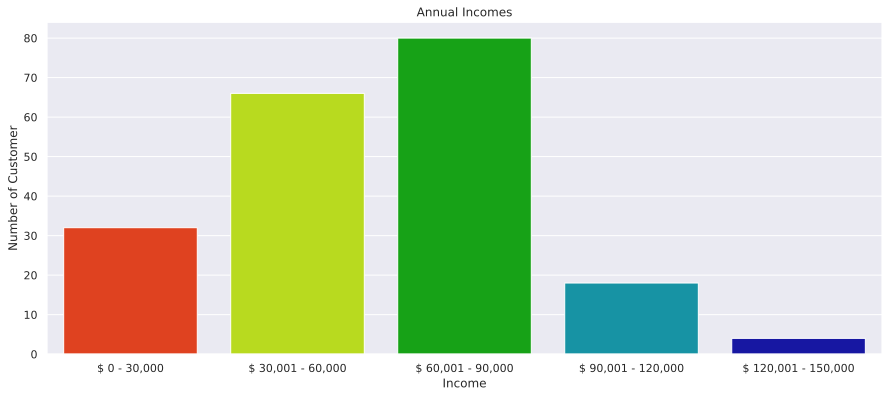

In [ ]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Maximum customers earn between $60,001 to 90,00 per year

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0




```
we are working with two features only, annual income and spending scor.
this will help us to understand the data easily and simplify the analysis.

```






In [ ]:
vals = data.iloc[:,[3,4]].values
print(vals[0:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


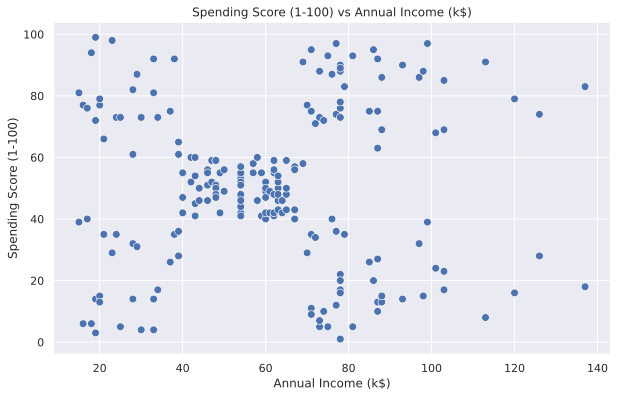

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

The data holds some patterns which can be seen in the above plot.






# **KMeans clustering.**
* K-Means clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters.
* Here, the “K” is the given number of predefined clusters, that need to be created.

* It is a centroid based algorithm in which each cluster is associated with a centroid. The main idea is to reduce the distance between the data points and their respective cluster centroid.

* The algorithm takes raw unlabelled data as an input and divides the dataset into clusters and the process is repeated until the best clusters are found.



Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.





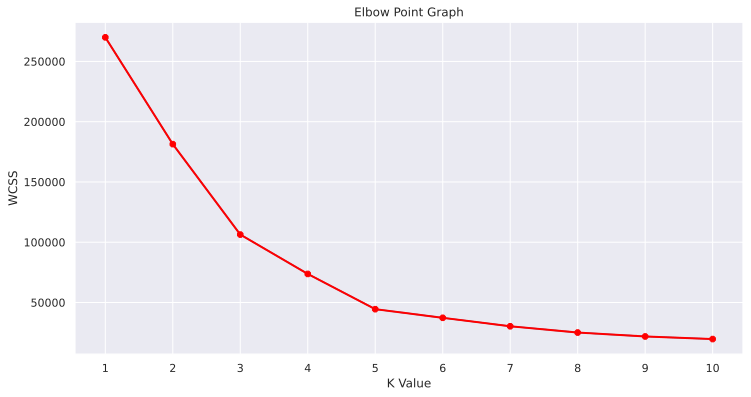

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(vals)
    wcss.append(kmeans.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Point Graph')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

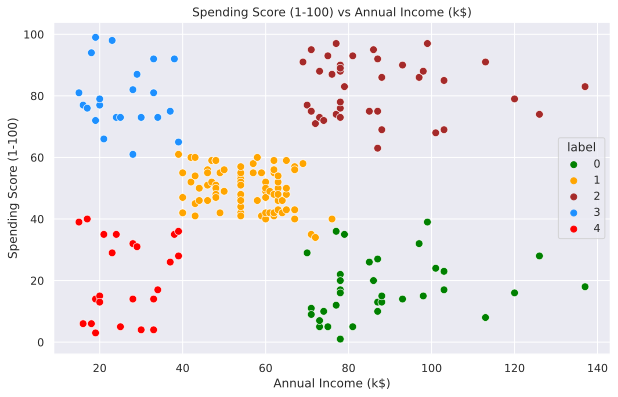

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0,n_init=10)
kmeans.fit(vals)  # Fitting the K-means model to your data

y=kmeans.predict(vals)
data["label"] = y
data.head(199)
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the brown cluster is the customers with the most income and most spending score.


In conclusion, the scatterplot depicting the relationship between "Annual Income (k$)" and "Spending Score (1-100)" provides valuable insights into the spending behavior of mall customers. It is evident from the plot that there is no clear linear correlation between annual income and spending score. Instead, customers seem to fall into distinct **clusters** or **segments**, which could be indicative of different customer groups with varying spending preferences. This visualization suggests that the mall could benefit from **segment-specific marketing strategies** to better cater to the needs and preferences of these customer groups.